In [1]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()

In [2]:
!ls

 clean-dirty-garbage-containers
 clean-dirty-garbage-containers-V2.zip
 clean-dirty-garbage-containers-V3.zip
 clean-dirty-garbage-containers-V4.zip
 clean-dirty-garbage-containers-V5.zip
 clean-dirty-garbage-containersV6-with-tf-records.zip
 clean-dirty-garbage-containers-V6.zip
 Contenedores_domiciliarios.csv
 detection_config.json
 detection_model-ex-007--loss-0011.802.h5
 detection_model-ex-007--loss-0011.802.zip
 examples-detected.jpg
 examples.jpg
 garbage-containers-v2.zip
 google_containers
 nuevos
 output_00.avi
 output_00.mp4
 output_01.avi
 output_01.mp4
 output_03.avi
 output_03.mp4
 output.avi
 sumary_sucio
 summary_limpio
 unlabeled
 Untitled.ipynb
 videos
'WhatsApp Unknown 2021-02-19 at 7.55.20 PM.zip'
 xml_annotations


In [3]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath('detection_model-ex-007--loss-0011.802.h5')
detector.setJsonPath("detection_config.json")
detector.loadModel()


In [4]:
img_path = 'examples.jpg'

In [5]:
detector.detectObjectsFromImage(input_image="examples.jpg", output_image_path="examples-detected.jpg")

/home/rlaguna/.pyenv/versions/3.7.6/envs/tf_2/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
/home/rlaguna/.pyenv/versions/3.7.6/envs/tf_2/lib/python3.7/site-packages/imageai/Detection/Custom/__init__.py:1248: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


[{'name': 'container',
  'percentage_probability': 71.61943316459656,
  'box_points': [1405, 257, 1649, 433]},
 {'name': 'container',
  'percentage_probability': 62.43106722831726,
  'box_points': [40, 360, 190, 497]},
 {'name': 'container',
  'percentage_probability': 65.91352224349976,
  'box_points': [887, 384, 1023, 505]},
 {'name': 'container',
  'percentage_probability': 61.81463003158569,
  'box_points': [255, 815, 482, 958]},
 {'name': 'container',
  'percentage_probability': 57.73083567619324,
  'box_points': [1442, 827, 1690, 1035]},
 {'name': 'container',
  'percentage_probability': 57.15262293815613,
  'box_points': [886, 903, 1117, 1113]}]

In [6]:
import cv2

In [7]:
detector.detectObjectsFromImage?

In [8]:
detector.detectObjectsFromImag?

Object `detector.detectObjectsFromImag` not found.


In [13]:
img = cv2.imread(img_path)
detector.detectObjectsFromImage(img, input_type='array', output_type='array',
                                display_percentage_probability=False, display_object_name=False)

/home/rlaguna/.pyenv/versions/3.7.6/envs/tf_2/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "
/home/rlaguna/.pyenv/versions/3.7.6/envs/tf_2/lib/python3.7/site-packages/imageai/Detection/Custom/__init__.py:1248: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


(array([[[107, 126, 153],
         [117, 139, 164],
         [146, 170, 194],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[104, 121, 148],
         [ 95, 115, 140],
         [118, 142, 164],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 98, 113, 139],
         [ 80,  98, 121],
         [ 93, 114, 135],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [9]:
def process_image(img, dtc):
    _, results = dtc.detectObjectsFromImage(img, input_type='array', output_type='array',
                                display_percentage_probability=False, display_object_name=False,
                                           nms_treshold=0.45, minimum_percentage_probability=60)
    
    for res in results:
        x1,y1,x2, y2 = res['box_points']
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 5)
    return img
        

In [10]:
import matplotlib.pylab as plt

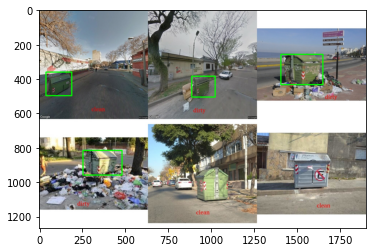

In [11]:
img = cv2.imread(img_path)
plt.imshow(process_image(img, detector)[...,::-1])

In [14]:
for i in [2,4,5]:

    src = f'videos/vid_0{i}.mp4'
    try:
        capture = cv2.VideoCapture(src)

        hh = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        ww = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        fps = capture.get(cv2.CAP_PROP_FPS)

        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(f'output_0{i}.avi',fourcc, fps, (ww,hh))

        while capture.isOpened():
            ret, frame = capture.read()
            if not ret:
                break

            process_image(frame, detector)
            out.write(frame)
    finally:
        capture.release()
        out.release()

In [15]:
! ffmpeg -i output_02.avi output_02.mp4
! ffmpeg -i output_04.avi output_04.mp4
! ffmpeg -i output_05.avi output_05.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

frame= 1326 fps= 92 q=-1.0 Lsize=    5043kB time=00:00:44.72 bitrate= 923.8kbits/s speed= 3.1x    
video:5032kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.221392%
[libx264 @ 0x55d1bf7e30c0] frame I:6     Avg QP:21.24  size: 10277
[libx264 @ 0x55d1bf7e30c0] frame P:979   Avg QP:24.05  size:  4226
[libx264 @ 0x55d1bf7e30c0] frame B:341   Avg QP:25.70  size:  2796
[libx264 @ 0x55d1bf7e30c0] consecutive B-frames: 59.9% 14.2% 10.0% 16.0%
[libx264 @ 0x55d1bf7e30c0] mb I  I16..4: 17.3% 75.4%  7.3%
[libx264 @ 0x55d1bf7e30c0] mb P  I16..4:  4.0% 16.6%  0.4%  P16..4: 56.7% 10.1%  3.1%  0.0%  0.0%    skip: 9.1%
[libx264 @ 0x55d1bf7e30c0] mb B  I16..4:  2.5%  9.8%  0.2%  B16..8: 47.4%  7.1%  0.9%  direct: 5.0%  skip:27.2%  L0:60.3% L1:31.1% BI: 8.6%
[libx264 @ 0x55d1bf7e30c0] 8x8 transform intra:78.8% inter:83.5%
[libx264 @ 0x55d1bf7e30c0] coded y,uvDC,uvAC intra: 48.2% 75.7% 8.9% inter: 23.2% 44.8% 0.8%
[libx264 @ 0x55d1bf7e30c0] i16 v,h,dc,p: 23% 33% 25% 19%
[

In [37]:
src = 'videos/vid_03.mp4'
try:
    capture = cv2.VideoCapture(src)

    hh = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    ww = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = capture.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output_03.avi',fourcc, fps, (ww,hh))
    
    while capture.isOpened():
        ret, frame = capture.read()
        if not ret:
            break
            
        process_image(frame, detector)
        out.write(frame)
finally:
    capture.release()
    out.release()

In [38]:
! echo $PWD

/home/rlaguna/idatha/no_version/contenedores/data
